# FACE MASK CLASSIFICATION with DEEP LEARNING
### Author
**IKA NURFITRIANI**

# Introduction
## Dataset Information
This dataset has 7553 RGB images in 2 folders as with_mask and without_mask. Images are named as label with_mask and without_mask. Images of faces with mask are 3725 and images of faces without mask are 3828.

## Dataset Source
The dataset that will be used in this project comes from the kaggle website and can be downloaded at the following link: [Dataset link](https://www.kaggle.com/datasets/omkargurav/face-mask-dataset)<br>

## Purpose
This project was created for the following purposes:<br>
● Explore and apply a specific deep learning model for image classification. <br>
● Develop and evaluate a deep learning model to determine its effectiveness in classifying images of faces with and without masks.<br>
● Gather, clean, and preprocess image data to prepare it for training the deep learning model. <br>
● Conduct exploratory data analysis to understand the dataset and prepare it for model training.<br>
● Utilize a Convolutional Neural Network (CNN) to create an effective face mask classification model. <br>
● Use the Streamlit framework to build a web application that allows users to upload images and receive real-time predictions on whether the person is wearing a mask or not.

MIT License

Copyright (c) 2024 Ika Nurfitriani

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# A. Install and Import Required Libraries
***

In [3]:
!pip install opencv-python
!pip install keras tensorflow
!pip install pillow
!pip install matplotlib

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 640.0 kB/s eta 0:01:01
   ---------------------------------------- 0.2/38.8 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.5/38.8 MB 3.9 MB/s eta 0:00:10
    --------------------------------------- 0.7/38.8 MB 4.0 MB/s eta 0:00:10
    --------------------------------------- 0.8/38.8 MB 4.1 MB/s eta 0:00:10
    --------------------------------------- 0.8/38.8 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.0/38.8 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.5/38.8 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.9/38.8 MB 4.9 MB/s eta 0:00:08
   -- -------

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/46/43/03fa53f027e78af4a6bee3564d05cb34d9f5b924dc69c85f8ef5cb950ff1/keras-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import logging
import cv2
import ipywidgets as widgets
import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from IPython.display import display, Image as IPImage
from PIL import Image as PILImage
from PIL import Image, ImageTk

import warnings
warnings.filterwarnings("ignore")

# B. Preparation and Exploring Dataset
***

In [37]:
# Memastikan folder data ada dan struktur direktori sesuai
data_path = 'data'
categories = ['with_mask', 'without_mask']

data = []
labels = []

if not os.path.exists(data_path):
    print(f"Folder {data_path} tidak ada.")
else:
    for category in categories:
        folder_path = os.path.join(data_path, category)
        
        if not os.path.exists(folder_path):
            print(f"Folder {folder_path} tidak ada.")
            continue
        
        print(f"Memproses folder: {folder_path}")
        
        images = os.listdir(folder_path)
        print(f"Jumlah gambar dalam {category}: {len(images)}")
        
        for img in images:
            img_path = os.path.join(folder_path, img)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.resize(image, (128, 128))
                data.append(image)
                labels.append(categories.index(category))
            else:
                print(f"Gagal memuat gambar {img_path}")

    data = np.array(data)
    labels = np.array(labels)

    print("Data shape:", data.shape)
    print("Labels shape:", labels.shape)

Memproses folder: data\with_mask
Jumlah gambar dalam with_mask: 3725
Memproses folder: data\without_mask
Jumlah gambar dalam without_mask: 3828
Data shape: (7553, 128, 128, 3)
Labels shape: (7553,)


# C. Menampilkan beberapa gambar dari setiap kategori
***

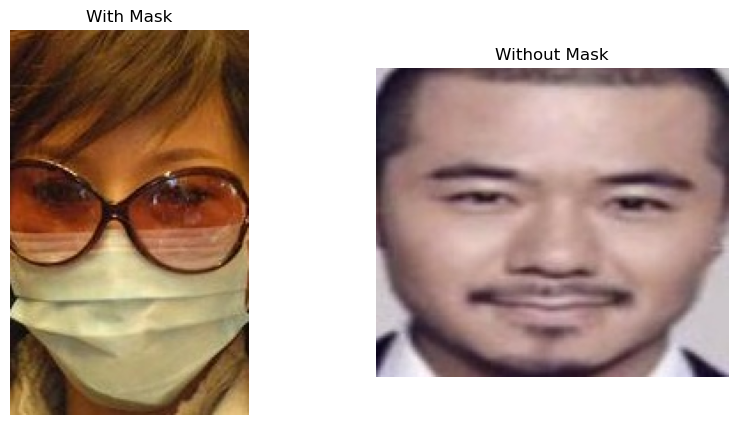

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(data_path, 'with_mask', os.listdir(os.path.join(data_path, 'with_mask'))[1])), cv2.COLOR_BGR2RGB))
axes[0].set_title('With Mask')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(cv2.imread(os.path.join(data_path, 'without_mask', os.listdir(os.path.join(data_path, 'without_mask'))[1])), cv2.COLOR_BGR2RGB))
axes[1].set_title('Without Mask')
axes[1].axis('off')

plt.show()

# D. Preprocessing Gambar
***

In [39]:
# Normalisasi data
data = data / 255.0  
labels = to_categorical(labels, num_classes=2)  

# Split data menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [40]:
# Augmentasi data
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# E. Modeling
***

In [41]:
# Membuat model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Melatih model dengan augmentasi data
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 48s 242ms/step - accuracy: 0.6837 - loss: 1.0314 - val_accuracy: 0.9001 - val_loss: 0.2696
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 47s 242ms/step - accuracy: 0.8629 - loss: 0.3298 - val_accuracy: 0.8974 - val_loss: 0.2767
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 46s 239ms/step - accuracy: 0.8652 - loss: 0.3112 - val_accuracy: 0.9126 - val_loss: 0.2141
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 46s 238ms/step - accuracy: 0.8831 - loss: 0.2746 - val_accuracy: 0.9226 - val_loss: 0.1964
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 46s 237ms/step - accuracy: 0.8909 - loss: 0.2588 - val_accuracy: 0.9100 - val_loss: 0.2210
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 45s 235ms/step - accuracy: 0.9021 - loss: 0.2331 - val_accuracy: 0.9318 - val_loss: 0.1711
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 46s 237ms/step - accuracy: 0.9021 - loss: 0.2303 - val_accuracy: 0.9345 - val_loss: 0.1685
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 47s 243ms/step - accuracy: 0.9140 - loss: 0

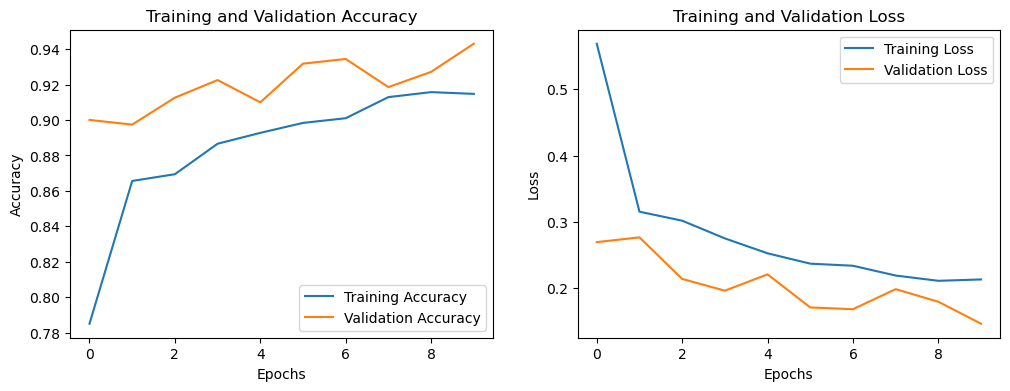

In [43]:
# Plot Akurasi dan Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [44]:
# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9368 - loss: 0.1605
Test Accuracy: 94.31%


In [45]:
# Menonaktifkan peringatan spesifik
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

# Simpan model dalam format HDF5
model.save('mask_classifier.h5')

MIT License

Copyright (c) 2024 Ika Nurfitriani

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.